In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os
##your anaconda3 folder \\Library\\share\\
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap
import datetime
import pickle
import math as ma
from netCDF4 import Dataset
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFECV
# Metrics function for reuse
def evaluate_model(y_true, y_pred):
    # Create confusion matrix
    cfm = pd.crosstab(y_true, y_pred, rownames=['Truth'], colnames=['Prediction'])
    # Create report
    from sklearn.metrics import accuracy_score, classification_report
    cr = classification_report(y_true, y_pred)
    return({'matrix':cfm, 'report':cr})

In [2]:
#type_number
#CI=2  C=4  weak=0  medium=1 strong=3
with open('cloudsat_cloud_info_1011_5type.pkl', 'rb') as f:
    clouds = pickle.load(f)
with open('cloudsat_cluster_info_1011_5type.pkl', 'rb') as f:
    hca = pickle.load(f)
with open('cloudsat_cloud_time_1011_5type.pkl', 'rb') as f:
    time = pickle.load(f)
with open('proj_feature_U.pkl', 'rb') as f:
    u = pickle.load(f)
with open('proj_feature_V.pkl', 'rb') as f:
    v = pickle.load(f)
with open('proj_feature_W.pkl', 'rb') as f:
    w = pickle.load(f)
with open('proj_feature_T.pkl', 'rb') as f:
    t = pickle.load(f)
with open('proj_feature_Q.pkl', 'rb') as f:
    q = pickle.load(f)
with open('proj_feature_Z.pkl', 'rb') as f:
    z= pickle.load(f)

In [3]:
#0 granual    1 julian     2 cloud num      3 lat           4 lon            5 size           6 top           7 bot                     8 landsea 
#9   0dbz mask          10  0dbz h            11  10dbz mask             12  10dbz h           13 max dBz           14 max h           
#15edge         16 edge           17 hori          18 system
print(clouds.shape)
print(hca.shape)
print(time.shape)
print(hca[0:60,])
regime=clouds[hca==2,:]
print(regime.shape)
regime_time=time[hca==2,:]
print(regime_time.shape)
print(regime_time[700,:])
print(regime[500,4])

(113382, 19)
(113382,)
(113382, 4)
[0 0 0 0 3 0 1 0 3 1 1 0 4 3 0 0 3 1 1 3 0 4 4 0 2 0 0 1 3 3 0 0 1 0 0 0 1
 3 1 0 0 0 0 3 0 1 1 0 3 1 0 0 1 0 0 0 0 0 1 3]
(4901, 19)
(4901, 4)
[2007.            6.           21.           18.63403035]
148.82


In [4]:
a=0
eventcount = np.zeros((366,10))
maskyear = np.zeros((366,10))
for i in range(0,4901):
    if regime[i,3] >0 and regime[i,3] <20 and regime[i,4] >110 and regime[i,4] <120:
        maskyear[int(regime[i,1])-1,int(regime_time[i,0])-2006] = 1
        eventcount [int(regime[i,1])-1,int(regime_time[i,0])-2006] = eventcount [int(regime[i,1])-1,int(regime_time[i,0])-2006]+1
        a=a+1
print(a)
b=np.sum(maskyear,axis=0)
print(np.sum(b))
print('total CI event day: ',np.sum(b))

356
296.0
total CI event day:  296.0


CI event counts:


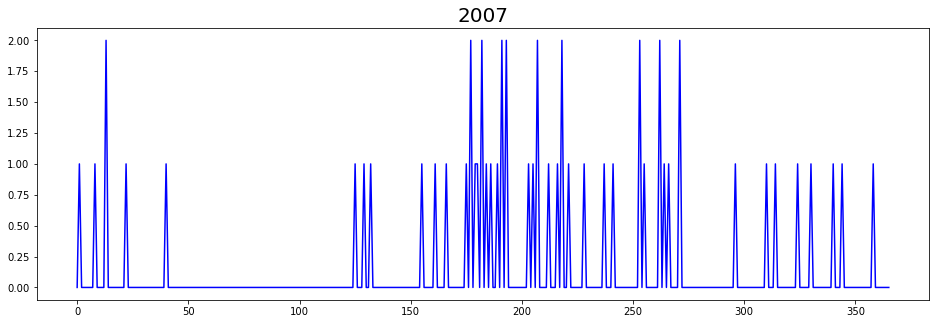

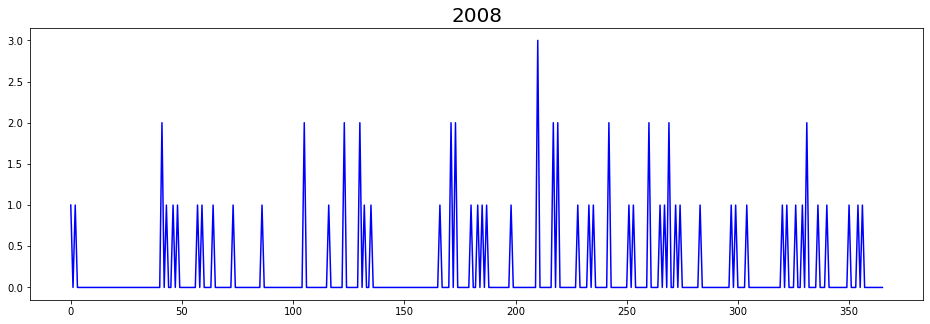

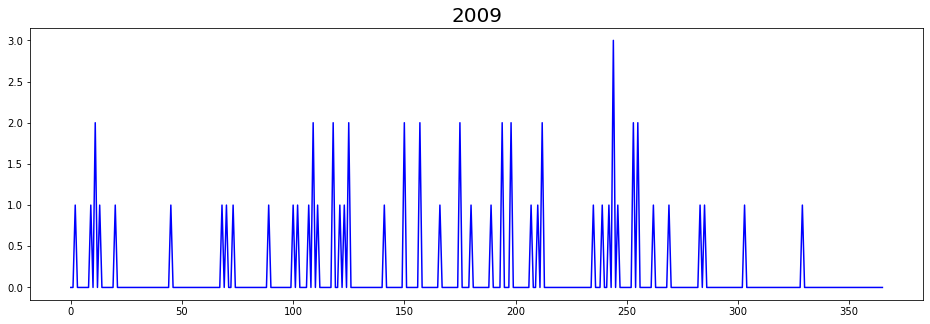

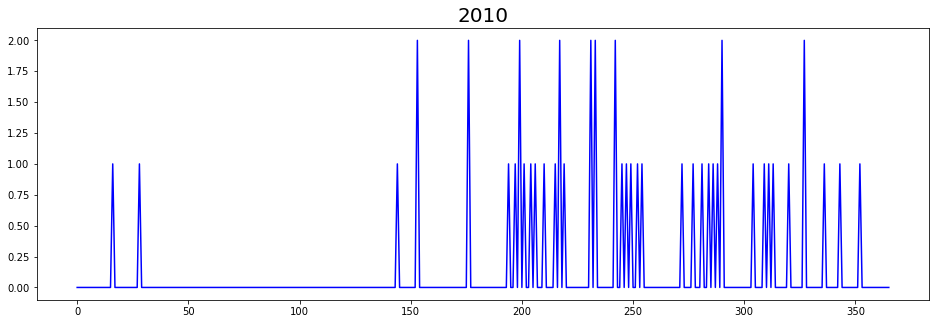

In [5]:
print('CI event counts:')
for j in range(1,5):
    a=2006+j
    fig = plt.figure(figsize=(16,5))
    plt.plot(eventcount[:,j], 'b-')
    plt.title(a,fontsize=20)
    plt.show()

In [6]:
a=0
testyear = np.zeros((366,10))
ttestyear = np.zeros((366,10))
for i in range(0,113382):
        testyear[int(clouds[i,1])-1,int(time[i,0])-2006] = testyear[int(clouds[i,1])-1,int(time[i,0])-2006]+1
        ttestyear[int(clouds[i,1])-1,0] = ttestyear[int(clouds[i,1])-1,0]+1
        a=a+1
print(a)

113382


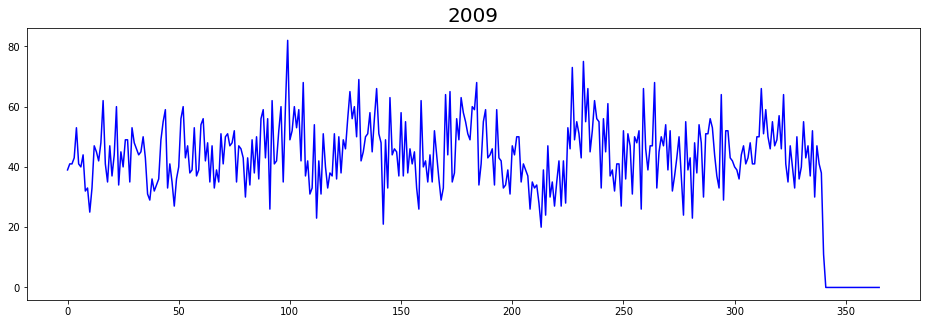

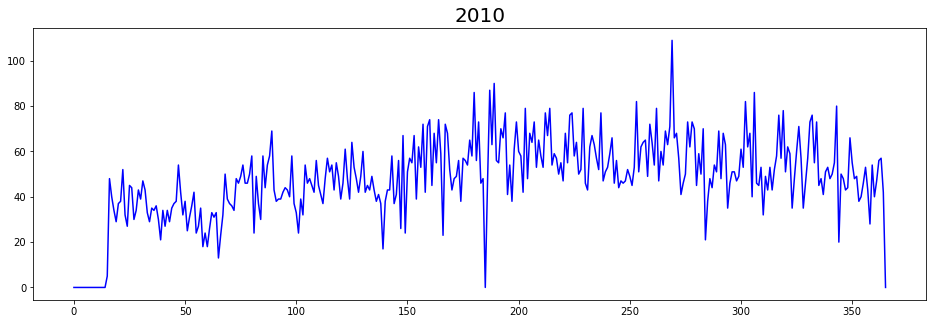

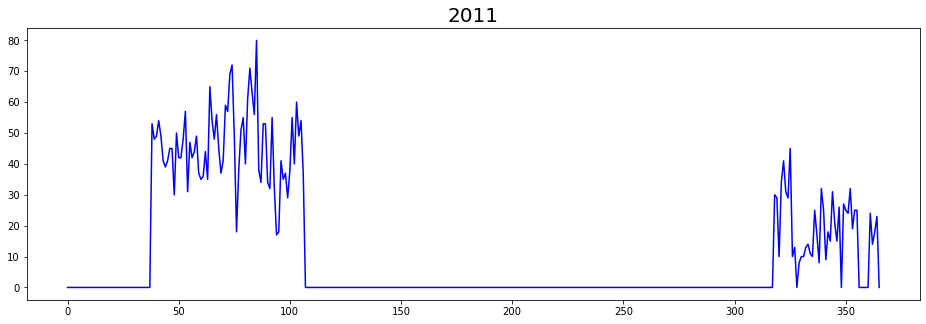

In [7]:
for j in range(3,6):
    a=2006+j
    fig = plt.figure(figsize=(16,5)) 
    plt.plot(testyear[:,j], 'b-')
    plt.title(a,fontsize=20)
    plt.show()

In [8]:
allyear= np.zeros((1,1))
allevent = np.zeros((1,1))
for k in range(0,10):
    kk = np.mod(k,4)
    if kk == 2:
        aaaa= np.zeros((366,1))
        aaaa[:,0] = maskyear[0:366,k]
        allaaaa = np.zeros((366,1))
        allaaaa[:,0]= testyear[0:366,k]
        #print(aaaa.shape)
    else:    
        aaaa= np.zeros((365,1))
        aaaa[:,0] = maskyear[0:365,k]
        allaaaa = np.zeros((365,1))
        allaaaa[:,0] = testyear[0:365,k]
        #print(aaaa.shape)
    allyear = np.concatenate((allyear, aaaa), axis=0)
    allevent = np.concatenate((allevent, allaaaa), axis=0)
allyear =np.delete(allyear,0,axis=0)
allevent =np.delete(allevent,0,axis=0)
print(allyear.shape)
print(allevent.shape)
#plt.plot(allyear [:,0], 'b-')
#print(allyear [300:365,0])
#print(aaaa [300:365,0])
#plt.show()

(3652, 1)
(3652, 1)


In [9]:
object_year=2006
alldate=np.zeros((3652,3))
for i in range(0,3652):
    test = datetime.datetime(object_year,1,1,0,0) + datetime.timedelta(i)
    testt=str(test)
    year=testt[0:4]
    mon=testt[5:7]
    day=testt[8:10]
    alldate[i,0] = int(year)
    alldate[i,1] = int(mon)
    alldate[i,2] = int(day)
    #print(allyear[i,:],year,mon,day)
print(alldate[3651,2])

31.0


(3114, 1)


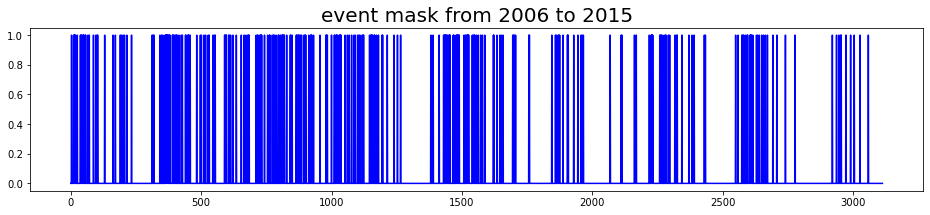

In [10]:
labeldata = allyear[allevent[:,0]>0]
labelyear = alldate[allevent[:,0]>0]
print(labeldata.shape)
fig = plt.figure(figsize=(16,3)) 
plt.plot(labeldata[:,0], 'b-')
plt.title('event mask from 2006 to 2015',fontsize=20)
plt.show()

In [11]:
nor_u = preprocessing.scale(u,axis=0)
nor_v = preprocessing.scale(v,axis=0)
nor_w = preprocessing.scale(w,axis=0)
nor_t = preprocessing.scale(t,axis=0)
nor_q = preprocessing.scale(q,axis=0)
nor_z = preprocessing.scale(z,axis=0)

In [12]:
nor_u0615=nor_u[2191:5843]
nor_v0615=nor_v[2191:5843]
nor_w0615=nor_w[2191:5843]
nor_t0615=nor_t[2191:5843]
nor_q0615=nor_q[2191:5843]
nor_z0615=nor_z[2191:5843]

In [13]:
sel_nor_u0615=nor_u0615[allevent[:,0]>0]
sel_nor_v0615=nor_v0615[allevent[:,0]>0]
sel_nor_w0615=nor_w0615[allevent[:,0]>0]
sel_nor_t0615=nor_t0615[allevent[:,0]>0]
sel_nor_q0615=nor_q0615[allevent[:,0]>0]
sel_nor_z0615=nor_z0615[allevent[:,0]>0]


(3652, 80)


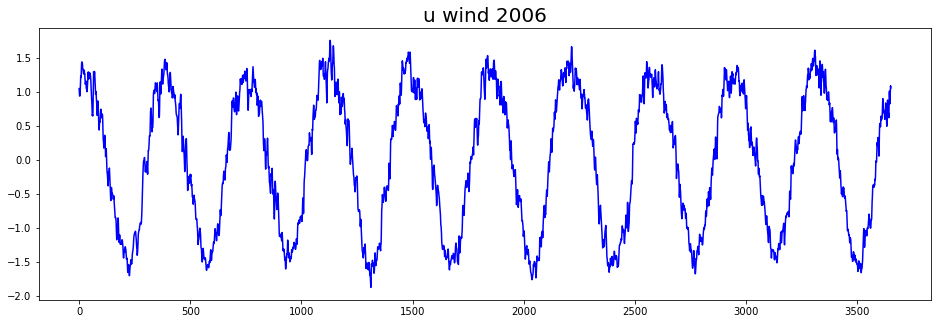

In [14]:
print(nor_u0615.shape)
fig = plt.figure(figsize=(16,5)) 
plt.plot(nor_u0615[:,0], 'b-')
plt.title('u wind 2006',fontsize=20)
plt.show()

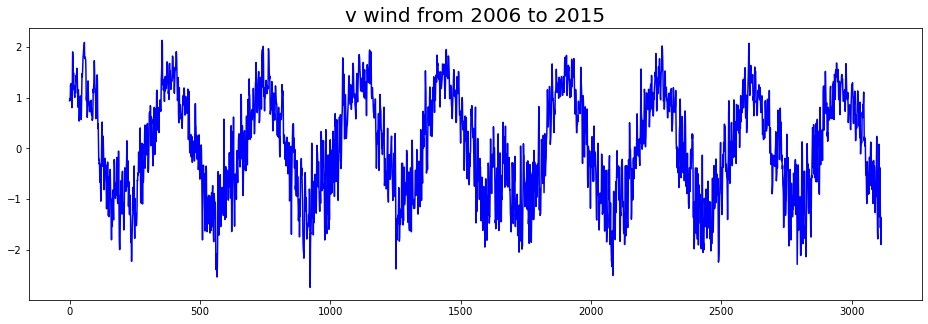

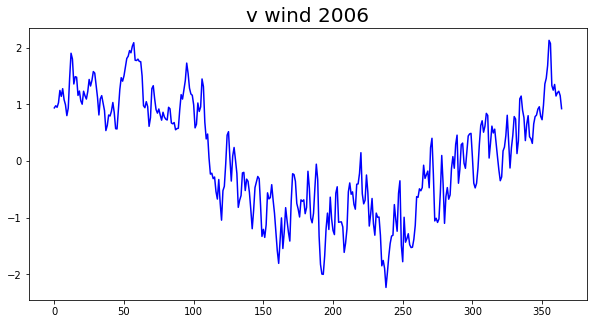

In [15]:
fig = plt.figure(figsize=(16,5)) 
plt.plot(sel_nor_v0615[:,0], 'b-')
plt.title('v wind from 2006 to 2015',fontsize=20)
plt.show()
fig = plt.figure(figsize=(10,5)) 
plt.plot(sel_nor_v0615[:365,0], 'b-')
plt.title('v wind 2006',fontsize=20)
plt.show()

In [16]:
features=np.concatenate((sel_nor_u0615, sel_nor_v0615), axis=1)
features=np.concatenate((features, sel_nor_w0615), axis=1)
features=np.concatenate((features, sel_nor_t0615), axis=1)
features=np.concatenate((features, sel_nor_q0615), axis=1)
features=np.concatenate((features, sel_nor_z0615), axis=1)
print(features.shape)
#plt.plot(features[:,80], 'b-')
#plt.show()

(3114, 480)


In [17]:
X = np.array(features[700:,:])
Y = np.array(labeldata[700:,0])
x_test = np.array(features[:700,:])
y_test = np.array(labeldata[:700,0])


#
print('Data dimension: ')
print('    Training set: ')
print(X.shape)
print(Y.shape)
print('    Test set: ')
print(x_test.shape)
print(y_test.shape)
print()

Data dimension: 
    Training set: 
(2414, 480)
(2414,)
    Test set: 
(700, 480)
(700,)



In [18]:

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

sp = SelectPercentile(mutual_info_classif, percentile=100)
sp.fit(X, Y)
newx = sp.transform(X)
print(newx.shape)

# Fit the classifier
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=3500)
glm.fit(newx, Y)
yhat = glm.predict(newx)

# Show results on training data
cfm = evaluate_model(Y, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

# Show results on test data
newx_test = sp.transform(x_test)
yhat = glm.predict(newx_test)
cfm = evaluate_model(y_test, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])


(2414, 480)
Prediction   0.0  1.0
Truth                
0.0         2176   29
1.0          122   87

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2205
         1.0       0.75      0.42      0.54       209

    accuracy                           0.94      2414
   macro avg       0.85      0.70      0.75      2414
weighted avg       0.93      0.94      0.93      2414

Prediction  0.0  1.0
Truth               
0.0         504  109
1.0          67   20

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       613
         1.0       0.16      0.23      0.19        87

    accuracy                           0.75       700
   macro avg       0.52      0.53      0.52       700
weighted avg       0.79      0.75      0.77       700



In [19]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict

In [20]:
x = np.array(features[:,:])
y = np.array(labeldata[:,0])
print(Y.shape)

(2414,)


In [21]:
kf = KFold(n_splits=10)
for train_indices, test_indices in kf.split(y):
    print('Train: %s | test: %s | Y=1: %s' % (len(train_indices), len(test_indices), float(y[test_indices,].mean())))

Train: 2802 | test: 312 | Y=1: 0.09615384615384616
Train: 2802 | test: 312 | Y=1: 0.16025641025641027
Train: 2802 | test: 312 | Y=1: 0.15705128205128205
Train: 2802 | test: 312 | Y=1: 0.125
Train: 2803 | test: 311 | Y=1: 0.11254019292604502
Train: 2803 | test: 311 | Y=1: 0.06109324758842444
Train: 2803 | test: 311 | Y=1: 0.05466237942122187
Train: 2803 | test: 311 | Y=1: 0.07395498392282958
Train: 2803 | test: 311 | Y=1: 0.07717041800643087
Train: 2803 | test: 311 | Y=1: 0.03215434083601286


In [22]:
skf = StratifiedKFold(n_splits=10)
for train_indices, test_indices in skf.split(X=x,y=np.array(y).flatten()):
    print('Train: %s | test: %s | Y=1: %s' % (len(train_indices), len(test_indices), float(y[test_indices,].mean())))

Train: 2802 | test: 312 | Y=1: 0.09615384615384616
Train: 2802 | test: 312 | Y=1: 0.09615384615384616
Train: 2802 | test: 312 | Y=1: 0.09615384615384616
Train: 2802 | test: 312 | Y=1: 0.09615384615384616
Train: 2803 | test: 311 | Y=1: 0.0932475884244373
Train: 2803 | test: 311 | Y=1: 0.0932475884244373
Train: 2803 | test: 311 | Y=1: 0.0932475884244373
Train: 2803 | test: 311 | Y=1: 0.0932475884244373
Train: 2803 | test: 311 | Y=1: 0.09646302250803858
Train: 2803 | test: 311 | Y=1: 0.09646302250803858


In [23]:
# Initialize the GLM
glm = LogisticRegression(C=1e5, solver='lbfgs', max_iter=5000)
# Fit and see in-sample error
glm.fit(x, np.array(y).flatten())
print('In-sample accuracy:')
print(glm.score(x, np.array(y).flatten()))


scores_kf = cross_val_score(glm, x, np.array(y).flatten(), cv=kf)
scores_skf = cross_val_score(glm, x, np.array(y).flatten(), cv=skf)
print('CV accuracy:')
print('  5-fold CV:')
print({'acc':scores_kf, 'mean':scores_kf.mean(), 'std':scores_kf.std()})
print('  Stratified 5-fold CV:')
print({'acc':scores_skf, 'mean':scores_skf.mean(), 'std':scores_skf.std()})

In-sample accuracy:
0.9171483622350675
CV accuracy:
  5-fold CV:
{'acc': array([0.81730769, 0.78525641, 0.76923077, 0.82692308, 0.78778135,
       0.88424437, 0.87459807, 0.88102894, 0.76205788, 0.90996785]), 'mean': 0.8298396405309589, 'std': 0.05118006291949658}
  Stratified 5-fold CV:
{'acc': array([0.81730769, 0.77884615, 0.66666667, 0.59935897, 0.69453376,
       0.80707395, 0.81350482, 0.78778135, 0.59163987, 0.8392283 ]), 'mean': 0.7395941545057301, 'std': 0.0887415488308275}


In [24]:
yhat = cross_val_predict(glm, x, y, cv=skf)
cfm = evaluate_model(y, yhat)
print(cfm['matrix'])
print()
print(cfm['report'])

Prediction   0.0  1.0
Truth                
0.0         2275  543
1.0          268   28

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      2818
         1.0       0.05      0.09      0.06       296

    accuracy                           0.74      3114
   macro avg       0.47      0.45      0.46      3114
weighted avg       0.81      0.74      0.77      3114



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the dataset
x = np.array(features[:,:])
y = np.array(labeldata[:,0])

# Split data into training and testing: 2005~2013 for training, and 2014 for testing
X_test = np.array(x[2400:,:])
y_test = np.array(y[2400:,]).flatten()
X_train = np.array(x[:2400,:])
y_train = np.array(y[:2400,]).flatten()

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#scores = ['precision', 'recall']
scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.469 (+/-0.048) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.461 (+/-0.063) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.477 (+/-0.043) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.461 (+/-0.063) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.454 (+/-0.087) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.468 (+/-0.040) for {'C': 1, 'kernel': 'linear'}
0.475 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.468 (+/-0.044) for {'C': 100, 'kernel': 'linear'}
0.472 (+/-0.039) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on th

C:\Users\jerry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
